# Logistic Regression using MINST

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn

import torchvision
from torchvision import transforms



In [33]:
from torchvision.datasets import MNIST

In [35]:
dataset = MNIST(root = 'DATA/', download=True)
len(dataset)

60000

MNIST dataset contains \
60,000 training images = _train = True_ \
10,000 testing images = _train = False_


In [36]:
train_data = MNIST( 'DATA/', train = True)
print('Training Data = ', len(train_data))

test_data = MNIST( 'DATA/', train = False)
print('Testing Data = ', len(test_data))

Training Data =  60000
Testing Data =  10000


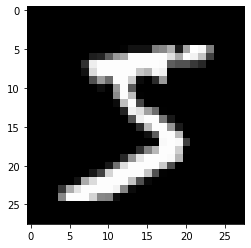

In [5]:
img, label = train_data[0]
ax = plt.imshow(img, cmap = 'gray')
ax.set_label('label')

tensor(1.) tensor(0.)


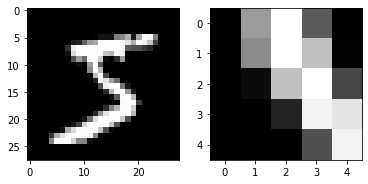

In [6]:
# we'll use the ToTensor transform to convert images into PyTorch tensors.

train_data = MNIST(root='Data/', train=True, transform=transforms.ToTensor())

img, label = train_data[0]
plt.subplot(121)
plt.imshow(img[0], cmap='gray')

print(torch.max(img), torch.min(img))

plt.subplot(122)
plt.imshow(img[0,10:15,10:15], cmap='gray')

# DataLoader - Batching

In [7]:
from torch.utils.data import DataLoader

1. Make Data set Ready
2. Generate Model (Forward pass)
3. Calculate Loss and Optimize (Backpass)


In [8]:
batch_size = 100

train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(dataset= test_data, batch_size=batch_size)

### Logistic Regression Model
$(pred = x @ w^T + b)$

From 60,000 training set:\
10,000 --> for **Validation Data Set**\
50,000 --> for **Training Data Set**

In [9]:
from torch.utils.data import random_split

In [10]:
train_set, val_set = random_split(train_data, [50000, 10000])

print(len(train_set), len(val_set))

50000 10000


Each 1x28x28 image tensor needs to be flattened out into a vector of size 784 (28*28), before being passed into the model

In [11]:
# Model

input_size = 28*28
n_classes = 10

model = nn.Linear(input_size, n_classes)

print('Weights', model.weight.shape)
print('bias', model.bias.shape)

Weights torch.Size([10, 784])
bias torch.Size([10])


In [12]:
# Check the data
# for img, label in train_loader:
#     print(img)
#     print(img.shape)
#     print(label)
    
#     # it gives an error of size missmatch: [2800 x 28]
#     output=model(img) 
#     break

## Define our Derived Model

In [13]:
# We have to convert (1x28x28) into 784 size vector
# We need to Flatten '.reshape'

# Our own defined function:

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, n_classes)
    
    def fwd(self, img_flat):
        img_flat = img_flat.reshape(-1, 784)
        # -1 -> consider the first dimension from (100,1,28,28)
        return self.linear(img_flat)

In [14]:
print('Weights', model.weight.shape)
print('bias', model.bias.shape)

list(model.parameters())

Weights torch.Size([10, 784])
bias torch.Size([10])


[Parameter containing:
 tensor([[-2.1386e-02, -6.4187e-03,  2.1061e-02,  ..., -3.7937e-03,
          -2.5735e-02, -2.0696e-03],
         [ 1.3357e-02,  1.4827e-02, -2.1932e-02,  ...,  7.8543e-03,
           2.7900e-02,  2.9369e-02],
         [-2.5810e-02, -5.3822e-03,  2.3208e-02,  ..., -3.5403e-02,
          -1.0144e-02,  3.4455e-02],
         ...,
         [ 1.9012e-02, -5.6665e-03, -5.6077e-03,  ...,  3.6664e-05,
           1.9219e-03, -6.3595e-03],
         [ 3.5403e-02, -2.1747e-02,  2.5800e-02,  ...,  1.4759e-03,
          -2.2265e-02, -3.4509e-02],
         [ 1.2166e-02,  1.4513e-02, -3.3587e-02,  ...,  5.2020e-03,
          -9.5686e-03, -3.2238e-02]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0106,  0.0101, -0.0162, -0.0230,  0.0342, -0.0257,  0.0328,  0.0179,
          0.0107, -0.0051], requires_grad=True)]

In [15]:
# Use the MODEL
model = MnistModel()

# Check the data
for img, label in train_loader:
    print(img.shape)
    print(label.shape)
    # it gives an error of size missmatch: [2800 x 28]
    output=model.fwd(img) 
    break
    
print('Output Shape', output.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])
Output Shape torch.Size([100, 10])


In [16]:
output[0]

tensor([-0.2181, -0.0679, -0.0743,  0.0104, -0.0962,  0.0497,  0.1026, -0.1985,
        -0.2884, -0.0262], grad_fn=<SelectBackward>)

### Negative outputs makes no sense
Pass them through **SoftMax** function\
It brings all the values from 0-1\


In [17]:
numerator = torch.exp(output[0])
numerator

# Negative values are gone
# but still not between 0 - 1
# as Probability adds to = 1

tensor([0.8041, 0.9344, 0.9284, 1.0105, 0.9083, 1.0510, 1.1081, 0.8199, 0.7494,
        0.9741], grad_fn=<ExpBackward>)

In [18]:
# SoftMax Equation

probability = numerator/torch.sum(numerator)
print(probability.shape)
print(probability)

torch.Size([10])
tensor([0.0866, 0.1006, 0.1000, 0.1088, 0.0978, 0.1132, 0.1193, 0.0883, 0.0807,
        0.1049], grad_fn=<DivBackward0>)


## PyTorch SoftMax function

In [19]:
import torch.nn.functional as F

In [20]:
# size = (batch_size, 1, 28,28) => torch.Size([100, 1, 28, 28])
probability = F.softmax(output, dim=1)  # as dim=0 are the dim of batch_size, We want to apply across 10 digits

print(probability[0])

tensor([0.0866, 0.1006, 0.1000, 0.1088, 0.0978, 0.1132, 0.1193, 0.0883, 0.0807,
        0.1049], grad_fn=<SelectBackward>)


### Now we pick the Highest Probability value

In [21]:
max_prob, max_pos = torch.max(probability, dim=1)

print(max_prob)
print(max_pos.shape)

tensor([0.1193, 0.1356, 0.1320, 0.1333, 0.1385, 0.1424, 0.1356, 0.1312, 0.1451,
        0.1217, 0.1181, 0.1250, 0.1289, 0.1355, 0.1484, 0.1338, 0.1548, 0.1381,
        0.1422, 0.1705, 0.1263, 0.1512, 0.1115, 0.1489, 0.1450, 0.1390, 0.1378,
        0.1496, 0.1428, 0.1595, 0.1278, 0.1427, 0.1268, 0.1416, 0.1295, 0.1485,
        0.1262, 0.1236, 0.1425, 0.1472, 0.1329, 0.1602, 0.1448, 0.1310, 0.1328,
        0.1194, 0.1326, 0.1177, 0.1387, 0.1203, 0.1518, 0.1611, 0.1413, 0.1268,
        0.1326, 0.1390, 0.1302, 0.1258, 0.1221, 0.1326, 0.1279, 0.1300, 0.1291,
        0.1319, 0.1282, 0.1803, 0.1276, 0.1702, 0.1481, 0.1623, 0.1136, 0.1218,
        0.1300, 0.1255, 0.1265, 0.1529, 0.1174, 0.1655, 0.1281, 0.1264, 0.1539,
        0.1265, 0.1582, 0.1341, 0.1342, 0.2024, 0.1096, 0.1213, 0.1245, 0.1763,
        0.1428, 0.1215, 0.1266, 0.1307, 0.1245, 0.1311, 0.1210, 0.1418, 0.1227,
        0.1568], grad_fn=<MaxBackward0>)
torch.Size([100])


In [22]:
print(max_pos)
print(label)

tensor([6, 6, 3, 9, 6, 6, 6, 2, 2, 8, 3, 3, 8, 6, 2, 6, 6, 2, 6, 6, 0, 6, 6, 6,
        9, 6, 9, 6, 2, 2, 3, 6, 2, 6, 6, 6, 9, 9, 6, 6, 6, 6, 9, 3, 6, 6, 9, 6,
        6, 9, 6, 6, 6, 6, 9, 6, 2, 9, 8, 9, 9, 9, 6, 6, 9, 6, 2, 6, 6, 6, 2, 3,
        3, 9, 2, 6, 3, 6, 6, 9, 6, 8, 6, 9, 9, 6, 9, 8, 7, 6, 9, 2, 7, 9, 9, 6,
        8, 6, 5, 6])
tensor([5, 4, 9, 2, 0, 9, 2, 7, 7, 1, 7, 1, 1, 4, 7, 2, 3, 9, 3, 6, 7, 1, 5, 0,
        9, 9, 5, 7, 9, 2, 7, 8, 8, 3, 5, 2, 0, 5, 0, 3, 5, 2, 4, 4, 5, 8, 4, 0,
        1, 1, 7, 0, 0, 9, 1, 1, 5, 6, 1, 9, 1, 8, 6, 3, 5, 8, 9, 6, 2, 6, 7, 5,
        7, 1, 9, 4, 1, 7, 9, 1, 6, 1, 2, 1, 3, 6, 5, 1, 5, 8, 8, 4, 0, 1, 8, 7,
        3, 9, 7, 1])


## Accuracy

In [23]:
def accuracy(output, labels):
    _, prediction = torch.max(output, dim=1)
    accu = torch.tensor(torch.sum(prediction == label).item()/len(prediction))
    # correct prediction/ total predictions = accuracy
    print("Accuracy = ", accu)

In [24]:
accuracy(output, label)

Accuracy =  tensor(0.0900)


### Problems:
Cannot be used as a **Loss Function**
1. == is not differentiable
2. does not take consideration of actual probabilities - it does not look for prob for true value

### Cross-Entropy
Take the logarithm of probability\
Log(high prob) = small -ve value\
Log(low prob) = large -ve value\
Function is differentiable

In [28]:
loss_cross = F.cross_entropy(output, label)
print(loss_cross)

tensor(2.3502, grad_fn=<NllLossBackward>)
